IPL stats extraction from 2021 to 2024, because in these years many new players emerged and the way of playing cricket is changed.

In [1]:
# Import libraries
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.express as px

In [2]:
# Load Dataset

dataset = pd.read_csv("Dataset/IPL_Meta_Data.csv")
df = dataset
metadata = dataset
# dataset.head()

C:\Users\niran\AppData\Local\Temp\ipykernel_5156\2260291665.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Dataset/IPL_Meta_Data.csv")


In [3]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.4,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,bowled,Abhishek Sharma,NaN,NaN


In [4]:
df.count()

match_id                  260920
season                    260920
start_date                260920
venue                     260920
innings                   260920
ball                      260920
batting_team              260920
bowling_team              260920
striker                   260920
non_striker               260920
bowler                    260920
runs_off_bat              260920
extras                    260920
wides                       8381
noballs                     1093
byes                         673
legbyes                     4001
penalty                        2
wicket_type                12950
player_dismissed           12950
other_wicket_type              0
other_player_dismissed         0
dtype: int64

In [5]:
# Here we are filtering om;y innings 1 and 2 because other numbers innings denotes the super overs
filtered_innings = df[df['innings'].isin([1,2])]
filtered_innings.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.4,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1426312,2024,5/26/2024,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abhishek Sharma,TM Head,...,0,NaN,NaN,NaN,NaN,NaN,bowled,Abhishek Sharma,NaN,NaN


In [6]:
# Here we are filtering only last 4 season to get the latest stats of a player
filtered_seasons = filtered_innings[filtered_innings['season'].isin([2021,2022,2023,2024])]

In [7]:
filtered_seasons.count()

match_id                  65524
season                    65524
start_date                65524
venue                     65524
innings                   65524
ball                      65524
batting_team              65524
bowling_team              65524
striker                   65524
non_striker               65524
bowler                    65524
runs_off_bat              65524
extras                    65524
wides                      2467
noballs                     312
byes                        160
legbyes                     868
penalty                       0
wicket_type                3325
player_dismissed           3325
other_wicket_type             0
other_player_dismissed        0
dtype: int64

In [8]:
filtered_seasons.nunique()

match_id                  272
season                      4
start_date                220
venue                      20
innings                     2
ball                      180
batting_team               11
bowling_team               11
striker                   300
non_striker               294
bowler                    232
runs_off_bat                7
extras                      6
wides                       5
noballs                     1
byes                        3
legbyes                     4
penalty                     0
wicket_type                10
player_dismissed          270
other_wicket_type           0
other_player_dismissed      0
dtype: int64

Getting all the players list

In [9]:
# players_list = df['striker'].append(df['non_striker']).append(df['bowler']).unique()

In [10]:
list_1 = filtered_seasons['striker'].unique()
list_2 = filtered_seasons['non_striker'].unique()
list_3 = filtered_seasons['bowler'].unique()

all_players = pd.unique(pd.concat([pd.Series(list_1), pd.Series(list_2), pd.Series(list_3)]))
players_list = pd.DataFrame(all_players, columns=['player_name'])



In [11]:
players_list.count()

player_name    334
dtype: int64

Now calculate the runs scored and balls faced by each player in each seasons

In [12]:
# Storing filtered_seasons in a new vairable for better understanding
four_seasons_data = filtered_seasons

In [13]:
# Create pivot table for runs scored
runs_data = four_seasons_data.pivot_table(index='striker', columns='season', values='runs_off_bat', aggfunc='sum', fill_value=0)
runs_data.reset_index(inplace=True)
runs_data.fillna('DNP', inplace=True)
runs_data.rename(columns={2021: 'runsin2021', 2022: 'runsin2022', 2023: 'runsin2023', 2024: 'runsin2024'}, inplace=True)

In [14]:
# Create pivot table for balls faced
balls_faced_df = four_seasons_data.pivot_table(index='striker', columns='season', values='runs_off_bat', aggfunc='count', fill_value=0)
balls_faced_df.reset_index(inplace=True)
balls_faced_df.rename(columns={2021: 'ballsfacedin2021', 2022: 'ballsfacedin2022', 2023: 'ballsfacedin2023', 2024: 'ballsfacedin2024'}, inplace=True)

In [15]:
# Merge the two DataFrames
batting_data = pd.merge(runs_data, balls_faced_df, on='striker')

In [16]:
batting_data.head()

season,striker,runsin2021,runsin2022,runsin2023,runsin2024,ballsfacedin2021,ballsfacedin2022,ballsfacedin2023,ballsfacedin2024
0,A Badoni,0,161,238,235,0,139,186,180
1,A Kamboj,0,0,0,2,0,0,0,2
2,A Manohar,0,108,114,9,0,79,86,16
3,A Mishra,0,0,19,0,0,0,30,0
4,A Nortje,0,1,37,4,0,7,29,9


In [17]:
# batting_data.to_csv("filtered_batting_data.csv")

Now calculate the wickets taken by each bowler and bowling economy in each seasons

In [18]:
# # Define wicket types
wicket_types = ['bowled', 'caught', 'caught and bowled', 'hit wicket', 'lbw', 'stumped']

# # Filter DataFrame for specified wicket types
wickets_df = four_seasons_data[four_seasons_data['wicket_type'].isin(wicket_types)]

# # Create pivot table for wickets taken
wickets_pivot_df = wickets_df.pivot_table(index='bowler', columns='season', values='wicket_type', aggfunc='count', fill_value=0)
wickets_pivot_df.reset_index(inplace=True)
wickets_pivot_df.rename(columns={2021: 'wicketsin2021', 2022: 'wicketsin2022', 2023: 'wicketsin2023', 2024: 'wicketsin2024'}, inplace=True)

# # Create pivot table for balls bowled
balls_bowled_df = four_seasons_data.groupby(['bowler', 'season'])['ball'].count().unstack().fillna(0)
balls_bowled_df.reset_index(inplace=True)
balls_bowled_df.rename(columns={2021: 'ballsbowledin2021', 2022: 'ballsbowledin2022', 2023: 'ballsbowledin2023', 2024: 'ballsbowledin2024'}, inplace=True)

# # Calculate total runs conceded
four_seasons_data['total_runs'] = four_seasons_data[['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty']].sum(axis=1)

# # Create pivot table for runs conceded
given_df = four_seasons_data.groupby(['bowler', 'season'])['total_runs'].sum().unstack().fillna(0)
given_df.reset_index(inplace=True)
given_df.rename(columns={2021: 'givenin2021', 2022: 'givenin2022', 2023: 'givenin2023', 2024: 'givenin2024'}, inplace=True)

# # Merge the DataFrames
combined_df = pd.merge(wickets_pivot_df, balls_bowled_df, on='bowler')
combined_df = pd.merge(combined_df, given_df, on='bowler')

# # Create the result tuple
# result = (combined_df, 'Wickets Taken, Balls Bowled, and Runs Conceded by Each Bowler in Each Season', 'Wickets taken, balls bowled, and runs conceded by each bowler in each season')

# # Display the result
# print(result)

C:\Users\niran\AppData\Local\Temp\ipykernel_5156\727688278.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_seasons_data['total_runs'] = four_seasons_data[['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty']].sum(axis=1)


In [19]:
combined_df.head()

season,bowler,wicketsin2021,wicketsin2022,wicketsin2023,wicketsin2024,ballsbowledin2021,ballsbowledin2022,ballsbowledin2023,ballsbowledin2024,givenin2021,givenin2022,givenin2023,givenin2024
0,A Badoni,0,2,0,0,0.0,12.0,1.0,12.0,0.0,13.0,0.0,25.0
1,A Kamboj,0,0,0,2,0.0,0.0,0.0,68.0,0.0,0.0,0.0,124.0
2,A Mishra,6,0,7,1,66.0,0.0,115.0,12.0,82.0,0.0,154.0,20.0
3,A Nortje,12,9,10,7,187.0,143.0,251.0,140.0,222.0,230.0,387.0,310.0
4,A Zampa,0,0,8,0,0.0,0.0,133.0,0.0,0.0,0.0,192.0,0.0


In [20]:
# combined_df.to_csv("filtered_bowling_data.csv")

Merge two datasets: batting_data and combined_df

In [21]:
merged_df = pd.merge(batting_data, combined_df, left_on='striker', right_on='bowler',how='left')

In [22]:
# merged_df.to_csv("mergeddataset.csv")

In [23]:
# In this merged dataset, need to remove the duplicate names in column and 
# fill the missing values in bowler columns

merged_df = merged_df.drop('bowler', axis=1)


In [24]:
merged_df.columns

Index(['striker', 'runsin2021', 'runsin2022', 'runsin2023', 'runsin2024',
       'ballsfacedin2021', 'ballsfacedin2022', 'ballsfacedin2023',
       'ballsfacedin2024', 'wicketsin2021', 'wicketsin2022', 'wicketsin2023',
       'wicketsin2024', 'ballsbowledin2021', 'ballsbowledin2022',
       'ballsbowledin2023', 'ballsbowledin2024', 'givenin2021', 'givenin2022',
       'givenin2023', 'givenin2024'],
      dtype='object', name='season')

In [25]:
null_counts = merged_df.isnull().sum()
null_counts

season
striker                0
runsin2021             0
runsin2022             0
runsin2023             0
runsin2024             0
ballsfacedin2021       0
ballsfacedin2022       0
ballsfacedin2023       0
ballsfacedin2024       0
wicketsin2021        131
wicketsin2022        131
wicketsin2023        131
wicketsin2024        131
ballsbowledin2021    131
ballsbowledin2022    131
ballsbowledin2023    131
ballsbowledin2024    131
givenin2021          131
givenin2022          131
givenin2023          131
givenin2024          131
dtype: int64

In [26]:
# Fill all the null values with 0 because if a player doesn't bowl or bat simply we can apply 0 
merged_df[['wicketsin2021', 'wicketsin2022', 'wicketsin2023','wicketsin2024']] = merged_df[['wicketsin2021', 'wicketsin2022', 'wicketsin2023','wicketsin2024']].fillna(0)


In [27]:
merged_df = merged_df.fillna(0)

In [28]:
# merged_df.to_csv("Structured_data.csv")

Calculate the total runs scored by a player

In [29]:
merged_df['totalrunsscored'] = merged_df['runsin2021'] + merged_df['runsin2022'] + merged_df['runsin2023'] + merged_df['runsin2024']

Calculate the total balls faced by each player

In [30]:
merged_df['totalballsfaced'] = merged_df['ballsfacedin2021'] + merged_df['ballsfacedin2022'] + merged_df['ballsfacedin2023'] + merged_df['ballsfacedin2024']

Calculate the total wickets taken by each player

In [31]:
merged_df['totalwickets'] = merged_df['wicketsin2021'] + merged_df['wicketsin2022'] + merged_df['wicketsin2023'] + merged_df['wicketsin2024']

Calculate the total balls bowled by each player

In [32]:
merged_df['totalballsbowled'] = merged_df['ballsbowledin2021'] + merged_df['ballsbowledin2022'] + merged_df['ballsbowledin2023'] + merged_df['ballsbowledin2024']

In [33]:
merged_df


season,striker,runsin2021,runsin2022,runsin2023,runsin2024,ballsfacedin2021,ballsfacedin2022,ballsfacedin2023,ballsfacedin2024,wicketsin2021,...,ballsbowledin2023,ballsbowledin2024,givenin2021,givenin2022,givenin2023,givenin2024,totalrunsscored,totalballsfaced,totalwickets,totalballsbowled
0,A Badoni,0,161,238,235,0,139,186,180,0.0,...,1.0,12.0,0.0,13.0,0.0,25.0,634,505,2.0,25.0
1,A Kamboj,0,0,0,2,0,0,0,2,0.0,...,0.0,68.0,0.0,0.0,0.0,124.0,2,2,2.0,68.0
2,A Manohar,0,108,114,9,0,79,86,16,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,231,181,0.0,0.0
3,A Mishra,0,0,19,0,0,0,30,0,6.0,...,115.0,12.0,82.0,0.0,154.0,20.0,19,30,14.0,193.0
4,A Nortje,0,1,37,4,0,7,29,9,12.0,...,251.0,140.0,222.0,230.0,387.0,310.0,42,45,38.0,721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,YBK Jaiswal,249,258,625,435,168,198,397,288,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1567,1051,0.0,0.0
296,YS Chahal,10,5,0,0,27,8,0,0,18.0,...,326.0,362.0,322.0,566.0,445.0,565.0,15,35,84.0,1391.0
297,YV Dhull,0,0,16,0,0,0,23,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16,23,0.0,0.0
298,Yash Dayal,0,0,0,0,0,1,0,0,0.0,...,88.0,322.0,0.0,309.0,169.0,510.0,0,1,28.0,615.0


Calculate the total runs give by each player

In [34]:
merged_df['totalrunsgiven'] = merged_df['givenin2021'] + merged_df['givenin2022'] + merged_df['givenin2023'] +merged_df['givenin2024']

In [35]:
merged_df.to_csv("calculated_data.csv")

Calculate the batting strike rate of each player
Formula:
Strike Rate = (Runs Scored / Balls faced) * 100

In [36]:
merged_df['batting_strike_rate'] = (merged_df['totalrunsscored'] / merged_df['totalballsfaced']) * 100

In [37]:
merged_df['batting_strike_rate'].head()

0    125.544554
1    100.000000
2    127.624309
3     63.333333
4     93.333333
Name: batting_strike_rate, dtype: float64

Calculate the bowling economy of each player
Formula:
Economy = Runs conceded / Total overs bowled


In [38]:
# merged_df = merged_df.drop('oversbowled', axis=1)

In [39]:
# For that we need to convert total balls bowled into overs

# Function to convert balls to overs
def balls_to_overs(balls):
    overs = math.floor(balls / 6)
    remaining_balls = balls % 6
    return f"{overs}.{remaining_balls}"

# Apply the conversion
merged_df['oversbowled'] = merged_df['totalballsbowled'].apply(balls_to_overs)

In [40]:
merged_df['oversbowled'].head()

0      4.1.0
1     11.2.0
2      0.0.0
3     32.1.0
4    120.1.0
Name: oversbowled, dtype: object

In [41]:

merged_df.columns

Index(['striker', 'runsin2021', 'runsin2022', 'runsin2023', 'runsin2024',
       'ballsfacedin2021', 'ballsfacedin2022', 'ballsfacedin2023',
       'ballsfacedin2024', 'wicketsin2021', 'wicketsin2022', 'wicketsin2023',
       'wicketsin2024', 'ballsbowledin2021', 'ballsbowledin2022',
       'ballsbowledin2023', 'ballsbowledin2024', 'givenin2021', 'givenin2022',
       'givenin2023', 'givenin2024', 'totalrunsscored', 'totalballsfaced',
       'totalwickets', 'totalballsbowled', 'totalrunsgiven',
       'batting_strike_rate', 'oversbowled'],
      dtype='object', name='season')

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   striker              300 non-null    object 
 1   runsin2021           300 non-null    int64  
 2   runsin2022           300 non-null    int64  
 3   runsin2023           300 non-null    int64  
 4   runsin2024           300 non-null    int64  
 5   ballsfacedin2021     300 non-null    int64  
 6   ballsfacedin2022     300 non-null    int64  
 7   ballsfacedin2023     300 non-null    int64  
 8   ballsfacedin2024     300 non-null    int64  
 9   wicketsin2021        300 non-null    float64
 10  wicketsin2022        300 non-null    float64
 11  wicketsin2023        300 non-null    float64
 12  wicketsin2024        300 non-null    float64
 13  ballsbowledin2021    300 non-null    float64
 14  ballsbowledin2022    300 non-null    float64
 15  ballsbowledin2023    300 non-null    flo

We found that the column oversbowled is in object datatype, need to convert into numrical types

In [43]:
def clean_overs(overs_string):
    # Split the string and take only the first two parts
    parts = overs_string.split('.')[:2]
    return '.'.join(parts)

merged_df['oversbowled_clean'] = merged_df['oversbowled'].apply(clean_overs)

In [44]:
merged_df['oversbowled_clean'] = pd.to_numeric(merged_df['oversbowled_clean'])


In [45]:
merged_df = merged_df.drop('oversbowled', axis=1)

In [46]:
# Use the formaula for calculating bowlers economy rate
merged_df['economyrate'] = merged_df['totalrunsgiven'] / merged_df['oversbowled_clean']

In [47]:
merged_df['economyrate'] = merged_df['economyrate'].round(2)


In [48]:
merged_df['batting_strike_rate'] = merged_df['batting_strike_rate'].round(2)

In [49]:
# merged_df.to_csv("check.csv")

get performance score
constraints:
runs >= 200
wickets >=20
strike rate >=120
economy rate <= 10.00
if he scored more than 200 and did not take wickets 

In [50]:
economyavg = merged_df['economyrate'].mean() 
steikerateavg = merged_df['batting_strike_rate'].mean()
print('avg of battingstrike rate '+ str(steikerateavg) + ' average of bowling economy '+ str(economyavg))

avg of battingstrike rate 108.15973333333332 average of bowling economy 9.388639053254437


In [51]:
# df['performance_score'] = (df['totalrunsscored'] + df['totalwickets']) / (df['totalballsbowled'] + df['totalballsfaced'])


performance_score = (995+2)/(123+787)
performance_score

1.0956043956043957

In [52]:
# merged_df.to_csv("check.csv")

In [53]:
complete_data = merged_df

Exploratory data analysis

season               runsin2021  runsin2022  runsin2023  runsin2024  \
season                                                                
runsin2021             1.000000    0.708037    0.593266    0.496810   
runsin2022             0.708037    1.000000    0.658215    0.597411   
runsin2023             0.593266    0.658215    1.000000    0.624013   
runsin2024             0.496810    0.597411    0.624013    1.000000   
ballsfacedin2021       0.992732    0.718696    0.596456    0.502662   
ballsfacedin2022       0.725914    0.990481    0.662048    0.596461   
ballsfacedin2023       0.601296    0.676503    0.992668    0.617069   
ballsfacedin2024       0.524939    0.630323    0.650311    0.990222   
wicketsin2021         -0.049099   -0.081167   -0.107106   -0.077123   
wicketsin2022         -0.112144   -0.077304   -0.148382   -0.162513   
wicketsin2023         -0.120085   -0.123529   -0.110586   -0.127694   
wicketsin2024         -0.115483   -0.102493   -0.109544   -0.071817   
ballsb

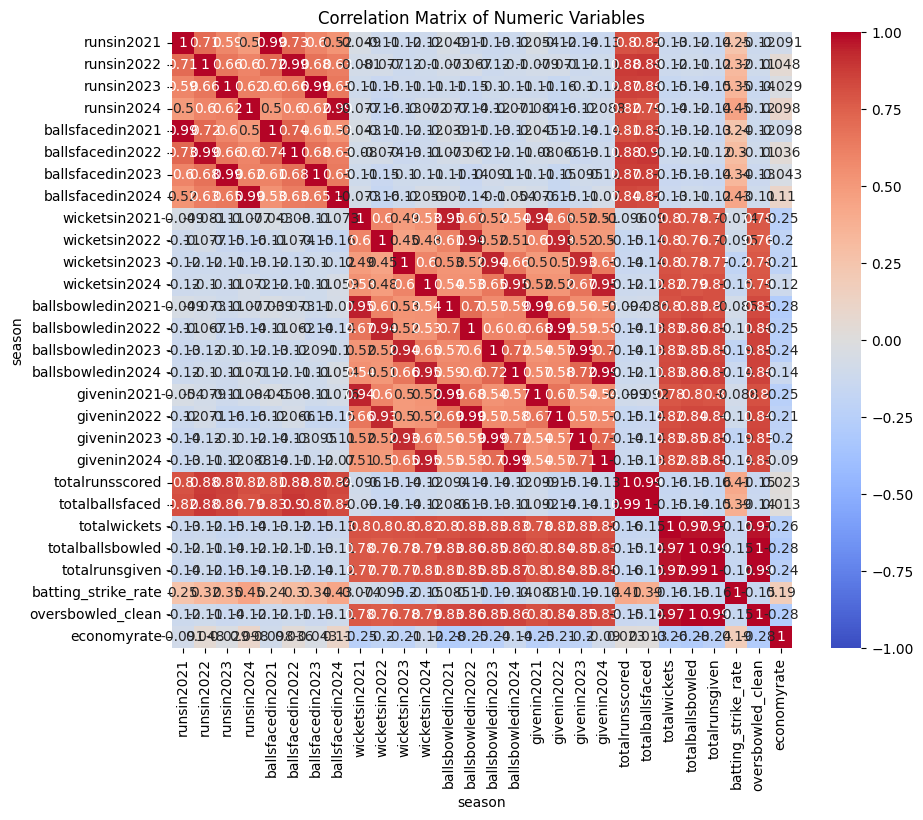

In [54]:
# Check the coreleation between variables
# Select only numeric columns
numeric_columns = complete_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

From the corelation mnatrix , it shows that there is less relation between battng data and bowling data. But has high relation withing batting and bowling data respectively. Hence we need to treat both sets of data seperately.

Data visualization

Text(0, 0.5, 'Striket rate')

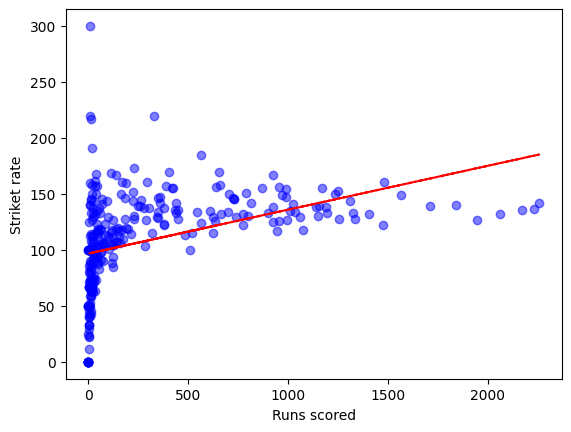

In [55]:
# Total Runs Scored vs. Batting Strike Rate
x = complete_data['totalrunsscored']
y = complete_data['batting_strike_rate']

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5)

# Calculate the regression line
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)

# Add the regression line to the plot
plt.plot(x, line(x), color='red', linestyle='--')

# Add labels and title
plt.xlabel('Runs scored')
plt.ylabel('Striket rate')

Text(0, 0.5, 'Economy rate')

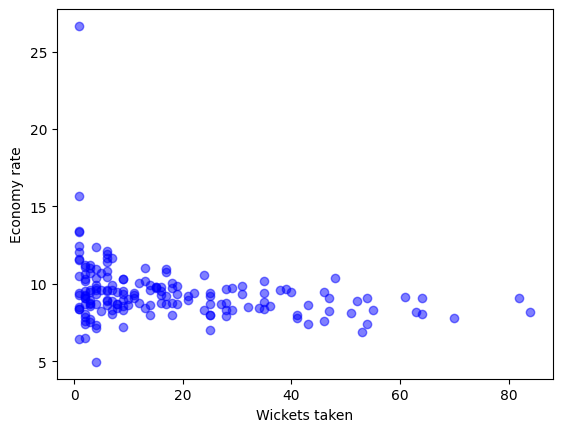

In [56]:
# Total wickets vs economy rate

x = complete_data['totalwickets']
y = complete_data['economyrate']

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5)

# Calculate the regression line
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)

# Add the regression line to the plot
plt.plot(x, line(x), color='red', linestyle='--')

# Add labels and title
plt.xlabel('Wickets taken')
plt.ylabel('Economy rate')

In [57]:
complete_data.columns

Index(['striker', 'runsin2021', 'runsin2022', 'runsin2023', 'runsin2024',
       'ballsfacedin2021', 'ballsfacedin2022', 'ballsfacedin2023',
       'ballsfacedin2024', 'wicketsin2021', 'wicketsin2022', 'wicketsin2023',
       'wicketsin2024', 'ballsbowledin2021', 'ballsbowledin2022',
       'ballsbowledin2023', 'ballsbowledin2024', 'givenin2021', 'givenin2022',
       'givenin2023', 'givenin2024', 'totalrunsscored', 'totalballsfaced',
       'totalwickets', 'totalballsbowled', 'totalrunsgiven',
       'batting_strike_rate', 'oversbowled_clean', 'economyrate'],
      dtype='object', name='season')

Explore players batting data

In [58]:
batting_columns = ['striker',
    'runsin2021', 'runsin2022', 'runsin2023', 'runsin2024',
    'ballsfacedin2021', 'ballsfacedin2022', 'ballsfacedin2023', 'ballsfacedin2024',
    'totalrunsscored', 'totalballsfaced', 'batting_strike_rate'
]

batting_stats_explore = complete_data[batting_columns].copy()

In [59]:
batting_stats_explore.head()
batting_stats_explore.to_csv("batting_data_explore.csv")

Text(0, 0.5, 'Striket rate')

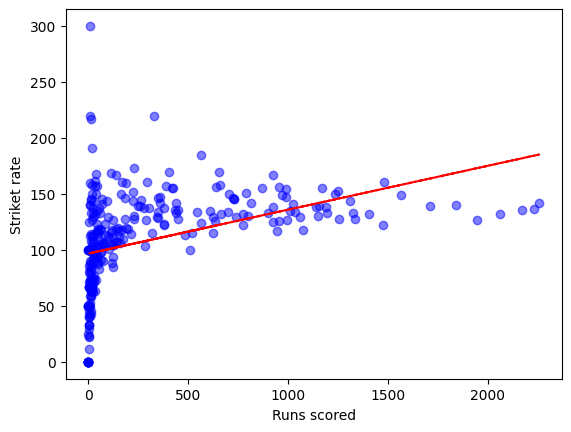

In [60]:
# Total Runs Scored vs. Batting Strike Rate
x = batting_stats_explore['totalrunsscored']
y = batting_stats_explore['batting_strike_rate']

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5)

# Calculate the regression line
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)

# Add the regression line to the plot
plt.plot(x, line(x), color='red', linestyle='--')

# Add labels and title
plt.xlabel('Runs scored')
plt.ylabel('Striket rate')

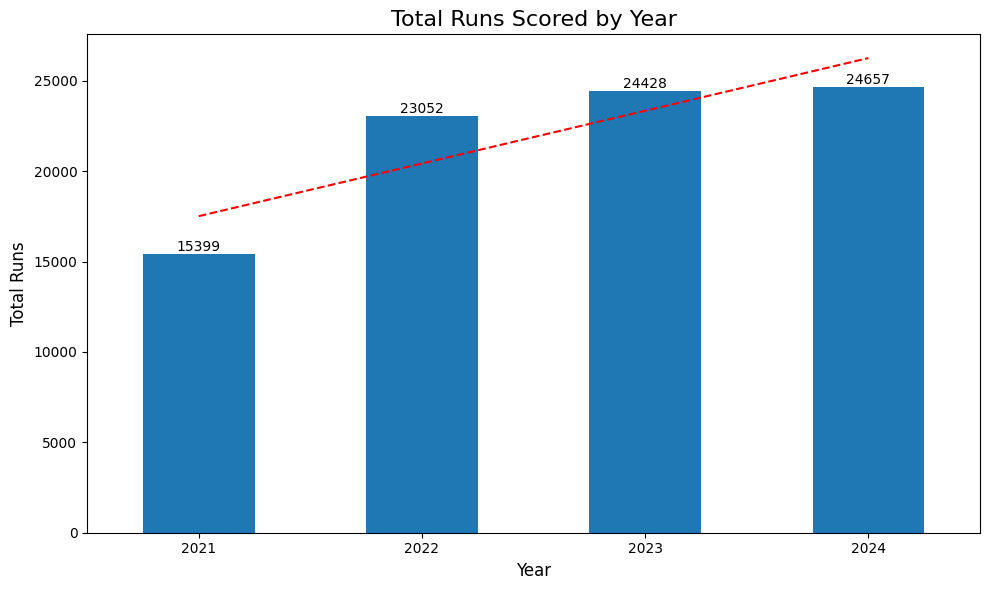

Total Runs by Year:
2021    15399
2022    23052
2023    24428
2024    24657
dtype: int64


In [61]:
# Calculate the sum of runs for each year
runs_by_year = {
    '2021': batting_stats_explore['runsin2021'].sum(),
    '2022': batting_stats_explore['runsin2022'].sum(),
    '2023': batting_stats_explore['runsin2023'].sum(),
    '2024': batting_stats_explore['runsin2024'].sum()
}

# Create a Series from the dictionary for easier plotting
runs_series = pd.Series(runs_by_year)

# Create a bar plot
plt.figure(figsize=(10, 6))
runs_series.plot(kind='bar')

# Customize the plot
plt.title('Total Runs Scored by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Add value labels on top of each bar
for i, v in enumerate(runs_series):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Create trend line
x = np.arange(len(runs_series))
y = runs_series.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plot trend line
plt.plot(x, line, color='red', linestyle='--', label=f'Trend (R² = {r_value**2:.2f})')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the total runs for each year
print("Total Runs by Year:")
print(runs_series)

In [62]:
# Calculate batting strike rate for each year for every players

batting_stats_explore['batting_strike_rate_2021'] = (batting_stats_explore['runsin2021'] / batting_stats_explore['ballsfacedin2021']) * 100
batting_stats_explore['batting_strike_rate_2021'] = batting_stats_explore['batting_strike_rate_2021'].round(2)


In [63]:
batting_stats_explore['batting_strike_rate_2022'] = (batting_stats_explore['runsin2022'] / batting_stats_explore['ballsfacedin2022']) * 100
batting_stats_explore['batting_strike_rate_2022'] = batting_stats_explore['batting_strike_rate_2022'].round(2)

In [64]:
batting_stats_explore['batting_strike_rate_2023'] = (batting_stats_explore['runsin2023'] / batting_stats_explore['ballsfacedin2023']) * 100
batting_stats_explore['batting_strike_rate_2023'] = batting_stats_explore['batting_strike_rate_2023'].round(2)

In [65]:
batting_stats_explore['batting_strike_rate_2024'] = (batting_stats_explore['runsin2024'] / batting_stats_explore['ballsfacedin2024']) * 100
batting_stats_explore['batting_strike_rate_2024'] = batting_stats_explore['batting_strike_rate_2024'].round(2)

In [66]:
batting_stats_explore.fillna(0)

season,striker,runsin2021,runsin2022,runsin2023,runsin2024,ballsfacedin2021,ballsfacedin2022,ballsfacedin2023,ballsfacedin2024,totalrunsscored,totalballsfaced,batting_strike_rate,batting_strike_rate_2021,batting_strike_rate_2022,batting_strike_rate_2023,batting_strike_rate_2024
0,A Badoni,0,161,238,235,0,139,186,180,634,505,125.54,0.00,115.83,127.96,130.56
1,A Kamboj,0,0,0,2,0,0,0,2,2,2,100.00,0.00,0.00,0.00,100.00
2,A Manohar,0,108,114,9,0,79,86,16,231,181,127.62,0.00,136.71,132.56,56.25
3,A Mishra,0,0,19,0,0,0,30,0,19,30,63.33,0.00,0.00,63.33,0.00
4,A Nortje,0,1,37,4,0,7,29,9,42,45,93.33,0.00,14.29,127.59,44.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,YBK Jaiswal,249,258,625,435,168,198,397,288,1567,1051,149.10,148.21,130.30,157.43,151.04
296,YS Chahal,10,5,0,0,27,8,0,0,15,35,42.86,37.04,62.50,0.00,0.00
297,YV Dhull,0,0,16,0,0,0,23,0,16,23,69.57,0.00,0.00,69.57,0.00
298,Yash Dayal,0,0,0,0,0,1,0,0,0,1,0.00,0.00,0.00,0.00,0.00


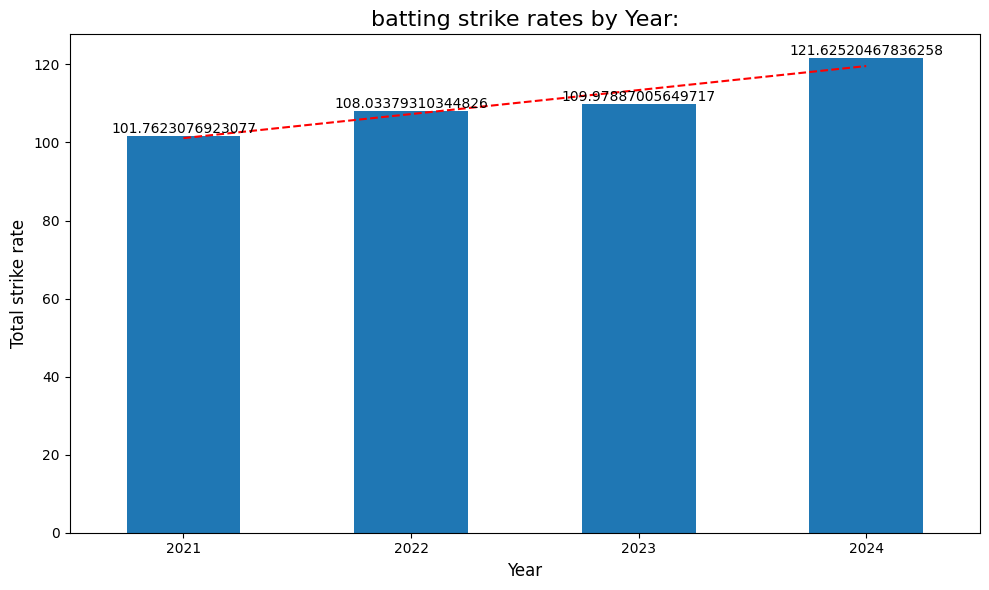

batting strike rates by Year:
2021    101.762308
2022    108.033793
2023    109.978870
2024    121.625205
dtype: float64


In [67]:
# Calculate the average strike rates for each year
sr_by_year = {
    '2021': batting_stats_explore['batting_strike_rate_2021'].mean(),
    '2022': batting_stats_explore['batting_strike_rate_2022'].mean(),
    '2023': batting_stats_explore['batting_strike_rate_2023'].mean(),
    '2024': batting_stats_explore['batting_strike_rate_2024'].mean()
}

# Create a Series from the dictionary for easier plotting
sr_series = pd.Series(sr_by_year)

# Create a bar plot
plt.figure(figsize=(10, 6))
sr_series.plot(kind='bar')

# Customize the plot
plt.title('batting strike rates by Year:', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total strike rate', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Add value labels on top of each bar
for i, v in enumerate(sr_series):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Create trend line
x = np.arange(len(sr_series))
y = sr_series.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plot trend line
plt.plot(x, line, color='red', linestyle='--', label=f'Trend (R² = {r_value**2:.2f})')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the total runs for each year
print("batting strike rates by Year:")
print(sr_series)

In [68]:
# Now see the distribution of batting strike rate

# Create the histogram
fig = px.histogram(batting_stats_explore, x='batting_strike_rate', 
                   title='Batting Strike Rate Histogram', 
                   labels={'batting_strike_rate': 'Batting Strike Rate', 'count': 'Frequency'})

# Store the result in a tuple
result = (fig, 'Batting Strike Rate Histogram', 'Distribution of batting strike rates')

# You can access the elements of the result tuple as needed
# For example:
# plot = result[0]
# title = result[1]
# description = result[2]

# To display the plot (if you're in a Jupyter notebook or similar environment)
fig.show()

In [69]:
# Now see the distribution of runs scored in 2024 and 2023

# Create the histogram for runs in 2024
fig1 = px.histogram(batting_stats_explore, x='runsin2024', 
                   title='runs in 2024 distribution in Histogram', 
                   labels={'runsin2024': 'Runs in 2024', 'count': 'Frequency'})

# Store the result in a tuple
result1 = (fig1, 'Runs in 2024 Histogram', 'Distribution of runs in 2024')

# Create the histogram for runs in 2023
fig2 = px.histogram(batting_stats_explore, x='runsin2023', 
                   title='runs in 2023 distribution in Histogram', 
                   labels={'runsin2023': 'Runs in 2023', 'count': 'Frequency'})


result2 = (fig1, 'Runs in 2023 Histogram', 'Distribution of runs in 2023')

# Create the histogram for runs in 2022
fig3 = px.histogram(batting_stats_explore, x='runsin2022', 
                   title='runs in 2022 distribution in Histogram', 
                   labels={'runsin2022': 'Runs in 2022', 'count': 'Frequency'})


result3 = (fig1, 'Runs in 2022 Histogram', 'Distribution of runs in 2022')


# To display the plot (if you're in a Jupyter notebook or similar environment)
fig1.show()
fig2.show()
fig3.show()

Analyse the Bowling data

In [70]:
bowling_columns = ['striker','wicketsin2021', 'wicketsin2022', 'wicketsin2023',
       'wicketsin2024', 'ballsbowledin2021', 'ballsbowledin2022',
       'ballsbowledin2023', 'ballsbowledin2024', 'givenin2021', 'givenin2022',
       'givenin2023', 'givenin2024','oversbowled_clean','economyrate','totalwickets', 'totalballsbowled', 'totalrunsgiven' ]

bowling_stats_explore = complete_data[bowling_columns].copy()

In [71]:
bowling_stats_explore.to_csv("bowling_stats_explore.csv")

In [72]:
# Distribution of wickets 

# Create the histogram for wickets in 2024
fig1 = px.histogram(bowling_stats_explore, x='wicketsin2021', 
                   title='wickets in 2021 distribution in Histogram', 
                   labels={'wicketsin2021': 'wickets in 2021', 'count': 'Frequency'})

# Store the result in a tuple
result1 = (fig1, 'Wickets in 2021 Histogram', 'Distribution of wickets in 2021')

# Create the histogram for wickets in 2024
fig2 = px.histogram(bowling_stats_explore, x='wicketsin2022', 
                   title='wickets in 2022 distribution in Histogram', 
                   labels={'wicketsin2022': 'wickets in 2022', 'count': 'Frequency'})

# Store the result in a tuple
result2 = (fig2, 'Wickets in 2022 Histogram', 'Distribution of wickets in 2022')

# Create the histogram for wickets in 2024
fig3 = px.histogram(bowling_stats_explore, x='wicketsin2023', 
                   title='wickets in 2023 distribution in Histogram', 
                   labels={'wicketsin2023': 'wickets in 2023', 'count': 'Frequency'})

# Store the result in a tuple
result3 = (fig3, 'Wickets in 2023 Histogram', 'Distribution of wickets in 2023')

# Create the histogram for wickets in 2024
fig4 = px.histogram(bowling_stats_explore, x='wicketsin2024', 
                   title='wickets in 2024 distribution in Histogram', 
                   labels={'wicketsin2024': 'wickets in 2024', 'count': 'Frequency'})

# Store the result in a tuple
result4 = (fig4, 'Wickets in 2024 Histogram', 'Distribution of wickets in 2024')

# To display the plot (if you're in a Jupyter notebook or similar environment)
fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [74]:
# batting_stats_explore.to_csv("Test.csv")
bowling_stats_explore.to_csv("Test_bowling.csv")